# 逻辑回归

在本练习中，你将实现逻辑回归并将其应用于两个不同的数据集。


# 大纲
- [ 1 - 包 ](#1)
- [ 2 - 逻辑回归](#2)
  - [ 2.1 问题描述](#2.1)
  - [ 2.2 加载与可视化数据](#2.2)
  - [ 2.3 Sigmoid 函数](#2.3)
  - [ 2.4 逻辑回归的损失函数](#2.4)
  - [ 2.5 逻辑回归的梯度](#2.5)
  - [ 2.6 通过梯度下降法学习参数](#2.6)
  - [ 2.7 绘制决策边界](#2.7)
  - [ 2.8 评估逻辑回归](#2.8)
- [ 3 - 逻辑回归的正则化](#3)
  - [ 3.1 问题描述](#3.1)
  - [ 3.2 加载与可视化数据](#3.2)
  - [ 3.3 特征映射](#3.3)
  - [ 3.4 正则化逻辑回归的损失函数](#3.4)
  - [ 3.5 正则化逻辑回归的梯度](#3.5)
  - [ 3.6 通过梯度下降法学习参数](#3.6)
  - [ 3.7 绘制决策边界](#3.7)
  - [ 3.8 评估正则化逻辑回归模型](#3.8)


<a name="1"></a>
## 1 - 包

首先，让我们运行下面的单元格来导入你在此分配期间需要的所有包。
- [numpy](www.numpy.org) 是使用 Python 进行科学计算的基础包。
- [matplotlib](http://matplotlib.org) 是一个著名的 Python 绘图库。
-  ``utils.py`` 包含此声明的辅助函数。你无需修改此文件中的代码。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

<a name="2"></a>
## 2 - 逻辑回归

在这部分练习中，你将建立一个逻辑回归模型来预测学生是否被大学录取。

<a name="2.1"></a>
### 2.1 问题描述

假设你是一个大学部门的管理员，并且你想根据每个申请人的两次考试成绩来确定他们的录取机会。
* 你拥有以前申请者的历史数据，可用作逻辑回归的训练集。
* 对于每个培训示例，你都有申请人在两次考试中的分数和录取决定。 
* 你的任务是建立一个分类模型，根据这两个考试的分数来估计申请人的录取概率。

<a name="2.2"></a>
### 2.2 加载与可视化数据

首先，你将为此任务加载数据集。 
- 如下所示， `load_dataset()` 函数将数据加载到变量 `X_train` 和 `y_train`中
  - `X_train` 包含学生两次考试的考试成绩
  - `y_train` 是录取决定 
      - `y_train = 1` 表示学生已经被录取
      - `y_train = 0` 表示学生没有被录取 
  - `X_train` 和 `y_train` 都是 numpy 数组


In [2]:
# load dataset
X_train, y_train = load_data("data/ex2data1.txt")

#### 查看变量
让我们更熟悉你的数据集。
- 一个好的开始是打印出每个变量，看看它包含什么。

下面的代码打印了 `X_train` 的前五个值和类型。

In [3]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


现在打印 `y_train` 的前五个值

In [4]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### 查看变量维度

另一种熟悉数据的有用方法是查看其维度。让我们打印 `X_train` 和 `y_train` 的形状，看看我们的数据集中有多少训练样例。

In [5]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### 可视化你的数据

在开始实现任何学习算法之前，如果可能的话，最好将数据可视化。
- 下面的代码将数据显示在 2D 图上（如下所示），其中轴是两个考试分数，正例和负例用不同的标记显示。
- 我们使用 `utils.py` 文件中的一个辅助函数来生成这个图。

<img src="images/figure 1.png" width="450" height="450">



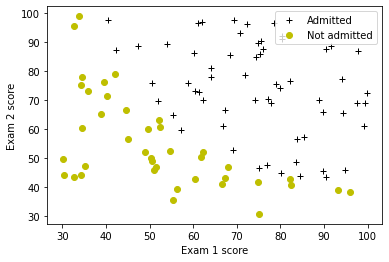

In [6]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

你的目标是建立一个逻辑回归模型来拟合这些数据。
- 使用此模型，你可以根据新学生在两次考试中的成绩预测是否会被录取。

<a name="2.3"></a>
### 2.3  Sigmoid 函数

回想一下，对于逻辑回归，模型表示为

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
其中 $g$ 是 sigmoid 函数。 sigmoid 函数的定义如下:

$$g(z) = \frac{1}{1+e^{-z}}$$

让我们先实现 sigmoid 函数，这样它就可以被这个声明的其余部分使用。

<a name='ex-01'></a>
### 练习 1
请完成 `sigmoid` 函数来计算

$$g(z) = \frac{1}{1+e^{-z}}$$

请注意
- `z` 并不总是一个数字，也可以是一个数字数组。
- 如果输入是一个数字数组，我们希望将 sigmoid 函数应用于输入数组中的每个值。

如果你遇到困难，你可以查看下面单元格后提供的提示，以帮助你实现。

In [7]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    g = 1 / (1 + np.exp(-z))
    
    ### END SOLUTION ###  
    
    return g

当你完成后，尝试在下面的单元格中调用 `sigmoid(x)` 来测试一些值。
- 对于较大的 x 正值，sigmoid 应该接近 1，而对于较大的负值，sigmoid 应该接近 0。
- 计算 `sigmoid(0)` 应该确切地得出 0.5. 


In [8]:
print ("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


**预期输出**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
    
- 如前所述，你的代码也应该适用于向量和矩阵。对于矩阵，你的函数应该对每个元素执行 sigmoid 函数。

In [9]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


**预期输出**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td> 
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td> 
  </tr>    
  
</table>

<a name="2.4"></a>
### 2.4 逻辑回归的损失函数

在本节中，你将实现逻辑回归的损失函数

<a name='ex-02'></a>
### 练习 2

请使用下面的等式，完成 `compute_cost` 函数

回想一下，对于逻辑回归，损失函数的形式为

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

其中
* m 是数据集中训练样例的数量


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ 是单个数据点的损失，即 - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ 是模型的预测， 其中 $y^{(i)}$ 是实际的标签

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ 其中函数 $g$ 是 sigmoid 函数.
    * 在计算 $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$ 之前，先计算一个中间变量可能会有所帮助： $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ 其中 $n$ 是特征数量， 

注意:
* 在执行此操作时，请记住变量 `X_train` 和 `y_train` 不是标量值，而是分别为 ($m, n$) 和 ($𝑚$,1) 形状的矩阵，其中 $𝑛$ 是特征和 $𝑚$ 是训练示例的数量。
* 对于这一部分，你可以使用上面实现的sigmoid函数。

如果你遇到困难，你可以查看下面单元格后提供的提示，以帮助你实现。

In [12]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    loss = 0
    ### START CODE HERE ###
    for i in range(m):
     z = np.dot(X, w) + b
    f = sigmoid(z)
    total_cost = (-y * np.log(f) - (1 - y) * np.log(1 - f)).mean()
        
        
    ### END CODE HERE ### 

    return total_cost

运行下面的单元格以检查你对参数 $w$ 的两种不同初始化的 `compute_cost` 函数的实现

In [13]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


**预期输出**:
<table>
  <tr>
    <td> <b>Cost at initial w (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [14]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)


Cost at test w,b: 0.218
All tests passed!


**预期输出**:
<table>
  <tr>
    <td> <b>Cost at test w,b<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 逻辑回归的梯度

在本节中，你将实现逻辑回归的梯度。

回想一下，梯度下降算法为:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

其中，参数 $b$, $w_j$ 都是同时更新的。


<a name='ex-03'></a>
### 练习 3

请完成 `compute_gradient` 函数，用于计算下方的等式（2）和（3） $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ 

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m 是数据集中训练样例的数量

    
*  $f_{\mathbf{w},b}(x^{(i)})$ 是模型的预测, 其中 $y^{(i)}$ 是实际标签


- **注意**: 虽然这个梯度看起来与线性回归梯度相同，但公式实际上是不同的，因为线性和逻辑回归对 $f_{\mathbf{w},b}(x)$ 有不同的定义。

和以前一样，你可以使用你在上面实现的 sigmoid 函数，如果遇到困难，你可以查看下面单元格后面的提示以帮助你实现。

In [17]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
   # for i in range(m):
    z = np.dot(X, w) + b
    f = sigmoid(z)
    dj_db = (f - y).mean()
    dj_dw = ((f - y).reshape(-1,1) * X).mean(axis=0)
    
    
    ### END CODE HERE ###
    # dj_db = (1 / m) * dj_db
    # dj_dw = (1 / m) * dj_dw

        
    return dj_db, dj_dw

运行下面的单元格以检查你对参数 $w$ 的两种不同初始化的 `compute_gradient` 函数的实现

In [18]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


**预期输出**:
<table>
  <tr>
    <td> <b>dj_db at initial w (zeros)<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>ddj_dw at initial w (zeros):<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [19]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)


dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]
All tests passed!


**预期输出**:
<table>
  <tr>
    <td> <b>dj_db at initial w (zeros)<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>ddj_dw at initial w (zeros):<b></td>
    <td>  [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 通过梯度下降法学习参数 

与之前的作业类似，你现在将通过使用梯度下降找到逻辑回归模型的最佳参数。
- 你不需要为此部分实现任何东西，只需运行下面的单元格。

- 验证梯度下降是否正常工作的一个好方法是查看 $J(\mathbf{w},b)$ 的值，并检查它是否随着每一步而减少。
 
- 假设你已经实现了梯度并正确计算了成本，那么你的 $J(\mathbf{w},b)$ 的值永远不会增加，并且应该在算法结束时收敛到一个稳定的值。

In [20]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

现在让我们运行上面的梯度下降算法来学习数据集的参数。

**注意**

下面的代码块需要几分钟才能运行，尤其是对于非矢量化版本。你可以减少 `iterations` 以测试你的实现并更快地迭代。如果你有时间，请尝试运行 100,000 次迭代以获得更好的结果。

In [21]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 100000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.01   
Iteration 10000: Cost     0.30   
Iteration 20000: Cost     0.30   
Iteration 30000: Cost     0.30   
Iteration 40000: Cost     0.29   
Iteration 50000: Cost     0.29   
Iteration 60000: Cost     0.29   
Iteration 70000: Cost     0.28   
Iteration 80000: Cost     0.28   
Iteration 90000: Cost     0.28   
Iteration 99999: Cost     0.28   


<details>
<summary>
    <b>预期输出: Cost     0.30, (单击查看细节):</b>
</summary>

    # With the following settings
    np.random.seed(1)
    intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
```

<a name="2.7"></a>
### 2.7 绘制决策边界

我们现在将使用梯度下降的最终参数来绘制线性拟合。如果你正确地实现了前面的部分，你应该看到下面的图
<img src="images/figure 2.png"  width="450" height="450">

我们将使用 `utils.py` 文件中的辅助函数来创建此图。

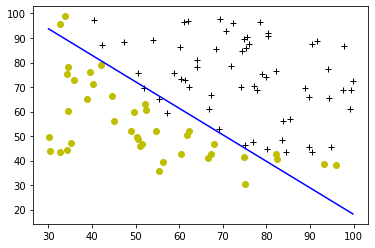

In [22]:
plot_decision_boundary(w, b, X_train, y_train)

<a name="2.8"></a>
### 2.8 评估逻辑回归

我们可以通过查看学习模型在我们的训练集上的预测效果来评估我们找到的参数的质量。

你将在下面实现 `predict` 函数来执行此操作。


<a name='ex-04'></a>
### 练习 4

请完成 `predict` 函数在给定数据集和学习参数向量 $w$ 和 $b$ 的情况下产生“1”或“0”预测。
- 首先，你需要从模型 $f(x^{(i)}) = g(w \cdot x^{(i)})$ 计算每个示例的预测
    - 你之前已经在上面的部分中实现了这一点
- 我们将模型的输出 ($f(x^{(i)})$) 解释为给定 $x^{(i)}$ 和参数化的 $w$，$y^{(i)}=1$ 的概率
- 因此，要从逻辑回归模型中获得最终预测（$y^{(i)}=0$ 或 $y^{(i)}=1$），你可以使用以下启发式 -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
    
如果你遇到困难，你可以查看下面单元格后提供的提示，以帮助你实现。

In [27]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
     z = np.dot(X, w) + b
    f = sigmoid(z)
    p = (f >= 0.5).astype(np.int32)
    


        
    ### END CODE HERE ### 
    return p

完成 `predict` 函数后，让我们运行下面的代码，通过计算正确示例的百分比来报告分类器的训练准确性。

In [28]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0 1 1 1]
All tests passed!


**预期输出** 

<table>
  <tr>
    <td> <b>Output of predict: shape (4,),value [0. 1. 1. 1.]<b></td>
  </tr>
</table>

现在让我们用它来计算训练集的准确率

In [29]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 91.000000


<table>
  <tr>
    <td> <b>Train Accuracy (approx):<b></td>
    <td> 92.00 </td> 
  </tr>
</table>

<a name="3"></a>
## 3 - 逻辑回归的正则化

在这部分练习中，你将实施正则化逻辑回归来预测制造厂的微芯片是否通过质量保证 (QA)。在 QA 期间，每个微芯片都会经过各种测试，以确保其正常运行。

<a name="3.1"></a>
### 3.1 问题描述

假设你是工厂的产品经理，你有一些微芯片在两个不同测试中的测试结果。
- 从这两个测试中，你想确定微芯片应该被接受还是被拒绝。
- 为了帮助你做出决定，你有一个过去微芯片的测试结果数据集，你可以从中构建逻辑回归模型。

<a name="3.2"></a>
### 3.2 加载与可视化数据

与本练习的前面部分类似，让我们首先为此任务加载数据集并对其进行可视化。

- 如下所示 `load_dataset()` 函数将数据加载到变量 `X_train` 和 `y_train`
  - `X_train` 包含两次测试的微芯片测试结果
  - `y_train` 包含 QA 的结果
      - `y_train = 1` 表示：微芯片被接受
      - `y_train = 0` 表示：微芯片被拒绝
  - `X_train` 和 `y_train` 都是 numpy 数组。

In [30]:
# load dataset
X_train, y_train = load_data("data/ex2data2.txt")

#### 查看变量

下面的代码打印了 `X_train` 和 `y_train` 的前五个值以及变量的类型。


In [31]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### 检查变量的维度

另一种熟悉数据的有用方法是查看其维度。让我们打印 `X_train` 和 `y_train` 的形状，看看我们的数据集中有多少训练样例。

In [32]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


#### 可视化数据

辅助函数 `plot_data` (来自 `utils.py`) 用于生成如图 3 所示的图形，其中轴是两个测试分数，正面（y = 1，接受）和负面（y = 0，拒绝）示例用不同的标记表示。

<img src="images/figure 3.png"  width="450" height="450">

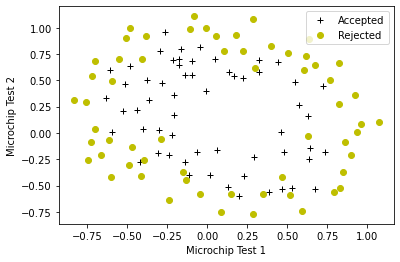

In [33]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

如图3所示，我们的数据集不能通过图中的直线分为正样本和负样本。因此，逻辑回归的直接应用在该数据集上表现不佳，因为逻辑回归只能找到线性决策边界。


<a name="3.3"></a>
### 3.3 特征映射

更好地拟合数据的一种方法是从每个数据点创建更多特征。在提供的函数 `map_feature` 中，我们将特征映射到 $x_1$ 和 $x_2$ 的所有多项式项，直到六次方。

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

作为这种映射的结果，我们的两个特征向量（两个 QA 测试的分数）已被转换为 27 维向量。

- 在这个更高维特征向量上训练的逻辑回归分类器将具有更复杂的决策边界，并且在我们的二维图中绘制时将是非线性的。
- 我们在 utils.py 中为你提供了 `map_feature` 函数。

In [34]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


让我们也打印 `X_train` 和 `mapped X` 的第一个元素来查看转换结果。

In [35]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


虽然特征映射允许我们构建更具表现力的分类器，但它也更容易受到过拟合的影响。在练习的下一部分中，你将实施正则化逻辑回归来拟合数据，并亲自了解正则化如何帮助解决过拟合问题。

<a name="3.4"></a>
### 3.4 正则化逻辑回归的损失函数

在这一部分中，你将实现正则化逻辑回归的损失函数。

回想一下，对于正则化逻辑回归，损失函数的形式为：
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

将其与不带正则化的代价函数（你在上面实现的）进行比较，其形式如下：
$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

不同的是正则化项，即 $$\frac{\lambda}{2m} \sum_{j=0}^{n-1} w_j^2$$
请注意，$b$ 参数未正则化。

<a name='ex-05'></a>
### 练习 5

请完成 `compute_cost_reg` 函数为 $w$ 中的每个元素计算以下项
$$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

启动代码将其添加到不带正则化的损失（你在上面的 `compute_cost` 函数中中计算）以计算带正则化的损失。

如果你遇到困难，你可以查看下面单元格后提供的提示，以帮助你实现。

In [37]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # You need to calculate this value
    reg_cost = 0.
    
    ### START CODE HERE ###
    
    
    reg_cost = (w ** 2).sum()
    
        
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

运行下面的单元格以检查你的“compute_cost_reg”函数的实现。

In [38]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)


Regularized cost : 0.6618252552483951
All tests passed!


**预期输出**:
<table>
  <tr>
    <td> <b>Regularized cost : <b></td>
    <td> 0.6618252552483948 </td> 
  </tr>
</table>

<a name="3.5"></a>
### 3.5 正则化逻辑回归的梯度

在本节中，你将实现正则化逻辑回归的梯度。


正则化成本函数的梯度有两个分量。第一个，$\frac{\partial J(\mathbf{w},b)}{\partial b}$是一个标量，另一个是一个与参数$\mathbf{w}$形状相同的向量，其中 $j^\mathrm{th}$ 元素定义如下：

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

将此与没有正则化的损失函数的梯度（你在上面实现）进行比较，其形式为
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


如你所见，$\frac{\partial J(\mathbf{w},b)}{\partial b}$ 是一样的,不同之处在下面这一项 $\frac{\partial J(\mathbf{w},b)}{\partial w}$, 即 $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$ 





<a name='ex-06'></a>
### 练习 6

请完成 `compute_gradient_reg` 函数，修改代码来计算下面的项

$$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

启动代码会将此项添加到从上面的 `compute_gradient` 返回的 $\frac{\partial J(\mathbf{w},b)}{\partial w}$ 中，以获得正则化成本函数的梯度。


如果你遇到困难，你可以查看下面单元格后提供的提示，以帮助你实现。

In [39]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###     
    
    dj_dw += lambda_ / m * w
        
        
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

运行下面的单元格以检查你对 `compute_gradient_reg` 函数的实现。

In [40]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)


dj_db: 0.07138288792343654
First few elements of regularized dj_dw:
 [-0.010386028450548703, 0.01140985288328012, 0.0536273463274574, 0.0031402782673134602]
All tests passed!


**预期输出**:
<table>
  <tr>
    <td> <b>dj_db:</b>0.07138288792343656</td> </tr>
  <tr>
      <td> <b> First few elements of regularized dj_dw:</b> </td> </tr>
   <tr>
   <td> [[-0.010386028450548701], [0.01140985288328012], [0.0536273463274574], [0.003140278267313462]] </td> 
  </tr>
</table>

<a name="3.6"></a>
### 3.6 通过梯度下降法学习参数

与前面部分类似，你将使用上面实现的梯度下降函数来学习最佳参数 $w$,$b$。
- 如果你正确完成了正则化逻辑回归的成本和梯度，你应该能够逐步通过下一个单元格来学习参数 $w$。
- 训练我们的参数后，我们将使用它来绘制决策边界。

**注意**

下面的代码块需要相当长的时间才能运行，尤其是对于非矢量化版本。你可以减少 `iterations` 以测试你的实现并更快地迭代。如果你有时间，请运行 100,000 次迭代以查看更好的结果。


In [41]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


<details>
<summary>
    <b>预期输出: Cost < 0.5  (Click for details)</b>
</summary>

```
# Using the following settings
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45       
    
```

<a name="3.7"></a>
### 3.7 绘制决策边界
为了帮助你可视化此分类器学习的模型，我们将使用我们的 `plot_decision_boundary` 函数绘制区分正例和负例的（非线性）决策边界。

- 在函数中，我们通过在均匀间隔的网格上计算分类器的预测来绘制非线性决策边界，然后绘制预测从 y = 0 变为 y = 1 的等高线图。

- 在学习了参数 $w$,$b$ 之后，下一步是绘制类似于图 4 的决策边界。

<img src="images/figure 4.png"  width="450" height="450">

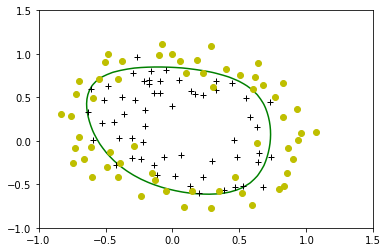

In [42]:
plot_decision_boundary(w, b, X_mapped, y_train)

<a name="3.8"></a>
### 3.8 评估正则化逻辑回归模型

你将使用上面实现的 `predict` 函数来计算训练集上的正则逻辑回归模型的准确性。

In [43]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390


**预期输出**:
<table>
  <tr>
    <td> <b>Train Accuracy:</b>~ 80%</td> </tr>
</table>